In [1]:
import  numpy as np

cifar10_outliers_ours = np.load('./cifar10_outlier_npos_embed_noise_0.07_select_50_KNN_300.npy')

In [2]:
!pwd

/d/IV-Research/OWOD/Reproduced Code/test


In [3]:
print(cifar10_outliers_ours.shape)

(10, 1000, 768)


In [7]:
cifar10_outliers_ours = cifar10_outliers_ours.reshape(10*1000, cifar10_outliers_ours.shape[2])

In [8]:
print(cifar10_outliers_ours.shape)

(10000, 768)


In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets


class KMeans:
    """使用python语言实现聚类算法"""

    def __init__(self, k, times):
        """
        初始化
        :param k: int，聚类的个数
        :param times: int，迭代的次数
        """
        self.k = k
        self.times = times

    def fit(self, X):
        """
        根据提供的训练数据，对模型进行训练
        :param X: 类数组类型，形状为 [样本数量，特征数量]，待训练的样本特征属性
        """
        X = np.asarray(X)
        # 设置随机种子，以便于可以产生相同的是随机序列（随机的结果可以重现）
        np.random.seed(0)
        # 从数据中随机选择k个点作为初始聚类中心
        self.clurter_centers = X[np.random.randint(0, len(X), self.k)]
        self.labels_ = np.zeros(len(X))

        for t in range(self.times):
            for index, x in enumerate(X):
                # 计算每个样本与聚类中心的距离
                dis = np.sqrt(np.sum((x - self.clurter_centers) ** 2, axis=1))
                # 将最小距离的索引赋值给标签数组, 索引的值就是当前点所属的簇， 范围为 [0, k-1]
                self.labels_[index] = dis.argmin()
            # 循环遍历每一个簇
            for i in range(self.k):
                # 计算每个簇内所有点的均值，更新聚类中心
                self.clurter_centers[i] = np.mean(X[self.labels_ == i], axis=0)

    def predict(self, X):
        """
        根据传递的样本，对样本数据进行预测（预测样本属于哪一个簇中）
        :param X: 类数组类型，形状为 [样本数量，特征数量]，待预测的样本特征属性
        :return: result 预测的结果（每一个x所属的簇）
        """
        X = np.asarray(X)
        result = np.zeros(len(X))
        for index, x in enumerate(X):
            # 计算与聚类中心的距离
            dis = np.sqrt(np.sum((x-self.clurter_centers)**2, axis=1))
            # 找到聚类最近的聚类中心，划分类别
            result[index] = dis.argmin()
        return result

In [8]:
km = KMeans(k=2, times=50)
km.fit(cifar10_outliers_ours)

# 查看某个簇类的所有样本数据
print(len(cifar10_outliers_ours[km.labels_ == 0]))

5854


In [9]:
import numpy as np
cifar10_outliers_ours = np.load('D:\\IV-Research\\OWOD\\Reproduced Code\\clean-test\\cifar10_outlier_npos_embed_noise_0.07_select_50_KNN_300.npy')

In [10]:
print(cifar10_outliers_ours.shape)

(10, 1000, 768)


In [11]:
cifar10_outliers_ours = cifar10_outliers_ours.reshape(10*1000, cifar10_outliers_ours.shape[2])

In [12]:
print(cifar10_outliers_ours.shape)

(10000, 768)


In [4]:
import torch
deep_ood_embeddings_cifar10 = torch.load('./deep_ood_embedding_cifar10.pt')

In [10]:
deep_ood_embeddings_cifar10 = deep_ood_embeddings_cifar10.cpu().numpy()
print(deep_ood_embeddings_cifar10.shape)

(50, 3, 16384)


In [5]:
# print(deep_ood_embeddings_cifar10.s)
deep_ood_embeddings_cifar10 = deep_ood_embeddings_cifar10.reshape(150, deep_ood_embeddings_cifar10.shape[2])

In [6]:
deep_ood_embeddings_cifar10.shape

torch.Size([150, 16384])

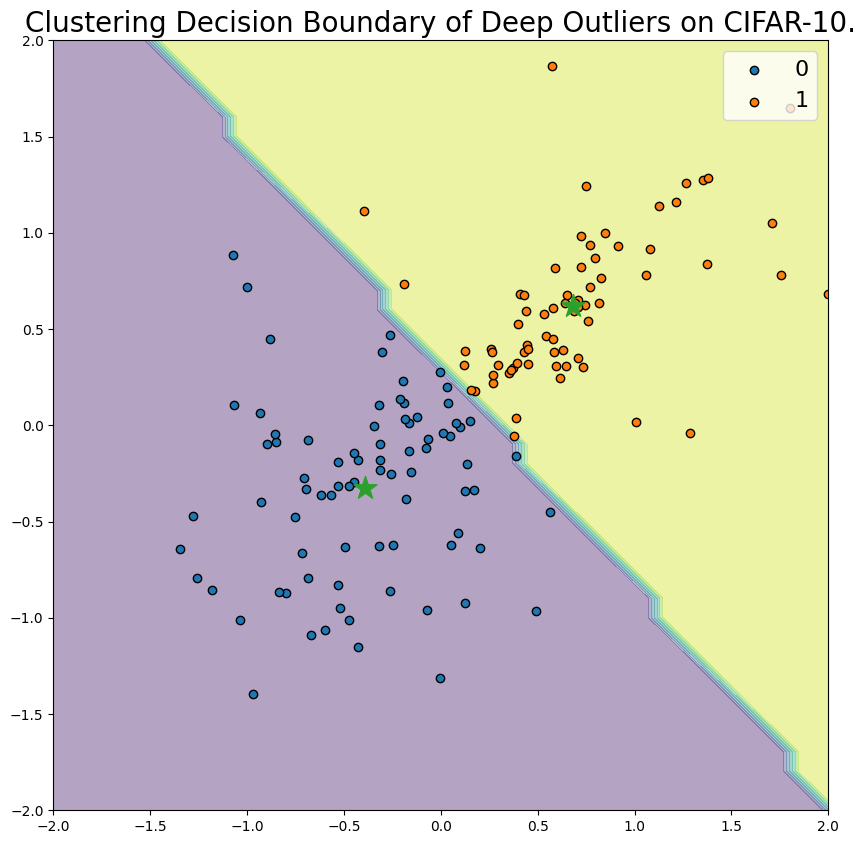

In [25]:
data2 = deep_ood_embeddings_cifar10[:150, :2]

kmeans = KMeans(k=2, times=50)
kmeans.fit(data2)

x_min, x_max = data2[:, 0].min() - 1, data2[:, 0].max() + 1
y_min, y_max = data2[:, 1].min() - 1, data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 可视化
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # 设置画布
plt.contourf(xx, yy, z, alpha=0.4)
plt.ylim(-2,2)
plt.xlim(-2,2)
# 绘制每个类别的散点图
plt.scatter(data2[kmeans.labels_ == 0][:, 0], data2[kmeans.labels_ == 0][:, 1], label='0', edgecolors='k')
plt.scatter(data2[kmeans.labels_ == 1][:, 0], data2[kmeans.labels_ == 1][:, 1], label='1', edgecolors='k')
# plt.scatter(cifar10_outliers_ours[km.labels_ == 2][:, 0], cifar10_outliers_ours[km.labels_ == 2][:, 1], label='2')
# 绘制聚类中心
plt.scatter(kmeans.clurter_centers[:, 0], kmeans.clurter_centers[:, 1], marker="*", s=300)
plt.title("Clustering Decision Boundary of Deep Outliers on CIFAR-10.", fontsize=20)
plt.legend(fontsize=16, loc='upper right')  # 生成图例
plt.savefig('./db2-cifar10-reproduce.png', bbox_inches='tight', dpi=700)
plt.show()

In [4]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(cifar10_outliers_ours)

D:\Aanaconda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# print(y_pred)
print(y_pred is kmeans.labels_)
print(kmeans.cluster_centers_.shape)

True
(2, 768)


In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, cifar10_outliers_ours)
plt.show()